In [174]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

import japanize_matplotlib

In [175]:
pl.Config.set_fmt_str_lengths(100)
pl.Config.set_tbl_rows(10)

polars.config.Config

In [177]:
train = pl.read_csv("../data/train.csv")
anime = pl.read_csv("../data/anime.csv")
test = pl.read_csv("../data/test.csv")
sample_submission = pl.read_csv("../data/sample_submission.csv")

# Define

In [178]:
def value_counts(df: pl.DataFrame, col: str) -> pl.DataFrame:
    q = (
        df
        .lazy()
        .groupby(col)
        .agg(
            [
                pl.col(col).count().alias("count"),
                (pl.col(col).count() / df.height).alias("rate"),
            ]
        )
        .sort("count", descending=True)
    )
    return q.collect()

In [207]:
def make_hist(df: pl.DataFrame, col: str, bins: int | None = None):
    if bins:
        plt.hist(df.get_column(col), bins=bins);
    else:
        plt.hist(df.get_column(col));
    plt.xlabel(f"{col}");
    plt.ylabel("count");
    plt.title(f"{col}の分布");

# train

In [179]:
train

user_id,anime_id,score
str,str,i64
"""0008e10fb39e55447333""","""0669cc0219d468761195""",2
"""0008e10fb39e55447333""","""111adb8835b8a1a2cf54""",10
"""0008e10fb39e55447333""","""1fc8683c393432a2f9c7""",1
"""0008e10fb39e55447333""","""2290175205d55e81b197""",8
"""0008e10fb39e55447333""","""28f173b60331d5cabb0d""",9
…,…,…
"""ffa6ff8006f8630f3d11""","""e9ba5ca32ea7e22e0a55""",6
"""ffa6ff8006f8630f3d11""","""ea2be994d7e36d2a720a""",7
"""ffa6ff8006f8630f3d11""","""ee3804a55e2b4ad58aad""",7


In [180]:
train.shape

(136401, 3)

In [181]:
train.head()

user_id,anime_id,score
str,str,i64
"""0008e10fb39e55447333""","""0669cc0219d468761195""",2
"""0008e10fb39e55447333""","""111adb8835b8a1a2cf54""",10
"""0008e10fb39e55447333""","""1fc8683c393432a2f9c7""",1
"""0008e10fb39e55447333""","""2290175205d55e81b197""",8
"""0008e10fb39e55447333""","""28f173b60331d5cabb0d""",9


In [183]:
train.get_column("user_id").value_counts(sort=True)

user_id,counts
str,u32
"""61c04a903417d6ed0500""",326
"""87e8bf4369b122472f54""",320
"""66e8ad1b15e37ffe34d8""",310
"""445bd5c54308fc81763d""",297
"""201b3dde31e826ba2030""",296
…,…
"""d747358f72dd5774d845""",1
"""d7b6bf8a99fdd3889579""",1
"""e12c84dfffb1c838c62d""",1


In [184]:
train.describe()

describe,user_id,anime_id,score
str,str,str,f64
"""count""","""136401""","""136401""",136401.0
"""null_count""","""0""","""0""",0.0
"""mean""",null,null,7.76877
"""std""",null,null,1.562456
"""min""","""0008e10fb39e55447333""","""000ba7f7e34e107e7544""",1.0
"""max""","""ffa6ff8006f8630f3d11""","""ffc3cf0c5f60dd844611""",10.0
"""median""",null,null,8.0
"""25%""",null,null,7.0
"""75%""",null,null,9.0


In [185]:
train.select(
    pl.col("user_id").n_unique().alias("n_users"),
    pl.col("anime_id").n_unique().alias("n_anime"),
)

n_users,n_anime
u32,u32
1794,1954


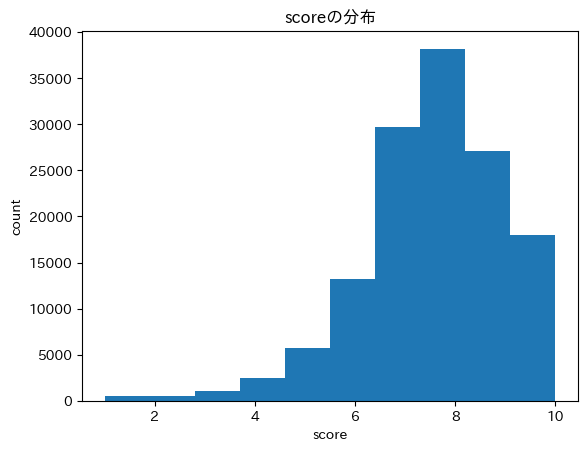

In [200]:
make_hist(train, "score", bins=10)

In [187]:
# 基本的にはscoreは高い、低いscoreをどう当てるかが重要そう

# anime

- anime_id: アニメ作品を識別する ID
- genres: 作品ジャンル. (複数)
- japanese_name: 作品名
- type: TV / OVA (オリジナルビデオアニメーション) など, 作品の提供方法. ex: TV
- episodes: 話数
- aired: 放映日 (範囲で差記載されている場合もあります)
- producers: 制作会社. (複数)
- licensors: ライセンス所有社. (複数)
- studios: スタジオ (複数)
- source: 作品の元ネタ. (ex: ライトノベル)
- duration: 一話ごとの長さ
- rating: 年齢制限
- members: アニメ作品のグループに登録しているユーザー数.
- watching: 作品を視聴中のユーザー数
- completed: 作品を見終わったユーザー数
- on_hold: 作品を保留にしているユーザー数
- dropped: 作品を見るのをやめてしまったユーザー数
- plan_to_watch: この作品を見る予定のユーザー数

In [224]:
anime.head()

anime_id,genres,japanese_name,type,episodes,aired,producers,licensors,studios,source,duration,rating,members,watching,completed,on_hold,dropped,plan_to_watch
str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64
"""000ba7f7e34e107e7544""","""Comedy, Sci-Fi, Seinen, Slice of Life, Space""","""宇宙兄弟""","""TV""","""99""","""Apr 1, 2012 to Mar 22, 2014""","""Aniplex, Dentsu, YTV, Trinity Sound""","""Sentai Filmworks""","""A-1 Pictures""","""Manga""","""24 min. per ep.""","""PG-13 - Teens 13 or older""",150428,16552,37234,13009,6948,76685
"""00427279d72064e7fb69""","""Adventure, Slice of Life, Mystery, Historical, Supernatural, Fantasy, Seinen""","""蟲師""","""TV""","""26""","""Oct 23, 2005 to Jun 19, 2006""","""Avex Entertainment, Marvelous, SKY Perfect Well Think, Delfi Sound""","""Funimation""","""Artland""","""Manga""","""25 min. per ep.""","""PG-13 - Teens 13 or older""",620736,55482,235371,42786,20017,267080
"""00444b67aaabdf740a68""","""Adventure, Slice of Life, Mystery, Historical, Supernatural, Fantasy, Seinen""","""蟲師 続章""","""TV""","""10""","""Apr 5, 2014 to Jun 21, 2014""","""Aniplex, Kodansha, Delfi Sound""","""Aniplex of America""","""Artland""","""Manga""","""24 min. per ep.""","""PG-13 - Teens 13 or older""",226522,12585,113559,6095,2606,91677
"""00839a3507ab168abe75""","""Comedy, Ecchi, Fantasy, School""","""星刻の竜騎士""","""TV""","""12""","""Apr 5, 2014 to Jun 21, 2014""","""Media Factory, AT-X, Sony Music Communications, Tsukuru no Mori""","""Funimation""","""C-Station""","""Light novel""","""24 min. per ep.""","""R+ - Mild Nudity""",170220,8723,118202,3753,8034,31508
"""0192331235e110fe4f76""","""Comedy, Harem, Romance, Sci-Fi, Shounen, Space""","""天地無用！""","""TV""","""26""","""Apr 2, 1995 to Sep 24, 1995""","""TV Tokyo, Pioneer LDC""","""Funimation, Geneon Entertainment USA""","""AIC""","""Original""","""23 min. per ep.""","""PG-13 - Teens 13 or older""",62599,2565,39890,2093,1986,16065


In [188]:
category_col = [
    'anime_id',
    'genres',
    'japanese_name',
    'type',
    'episodes',
    'aired',
    'producers',
    'licensors',
    'studios',
    'source',
    'duration',
    'rating'
]

In [189]:
anime.describe()

describe,anime_id,genres,japanese_name,type,episodes,aired,producers,licensors,studios,source,duration,rating,members,watching,completed,on_hold,dropped,plan_to_watch
str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64
"""count""","""2000""","""2000""","""2000""","""2000""","""2000""","""2000""","""2000""","""2000""","""2000""","""2000""","""2000""","""2000""",2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,null,null,null,null,null,null,null,null,null,null,null,253940.799,17064.0235,166181.434,7034.639,8348.2405,55312.462
"""std""",null,null,null,null,null,null,null,null,null,null,null,null,287347.448845,38443.485831,221171.258192,10841.661348,11630.352335,48223.874565
"""min""","""000ba7f7e34e107e7544""","""Action""","""-クラナド- もうひとつの世界 智代編""","""Movie""","""1""","""2021""","""5pb.""","""4Kids Entertainment""","""8bit""","""4-koma manga""","""1 hr.""","""G - All Ages""",60101.0,0.0,0.0,0.0,0.0,3195.0
"""max""","""ffc3cf0c5f60dd844611""","""Vampire""","""Ｄ・Ｎ・ＡＮＧＥＬ""","""Unknown""","""Unknown""","""Unknown""","""flying DOG, Sunny Side Up, Studio Jack, Shounen Gahousha""","""feel.""","""ufotable""","""Web manga""","""Unknown""","""Unknown""",2.589552e6,887333.0,2.182587e6,187919.0,174710.0,425531.0
"""median""",null,null,null,null,null,null,null,null,null,null,null,null,148887.5,7763.5,89726.0,4050.0,5316.0,39107.5
"""25%""",null,null,null,null,null,null,null,null,null,null,null,null,91958.0,3468.0,52541.0,1765.0,1319.0,23713.0
"""75%""",null,null,null,null,null,null,null,null,null,null,null,null,283656.0,16970.0,181913.0,7728.0,11013.0,71051.0


In [190]:
anime.select(
    pl.col(category_col).n_unique()
)

anime_id,genres,japanese_name,type,episodes,aired,producers,licensors,studios,source,duration,rating
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
2000,1329,1931,7,95,1653,1405,134,271,13,151,7


In [191]:
anime.select(
    pl.col(category_col).unique().head(5)
)

anime_id,genres,japanese_name,type,episodes,aired,producers,licensors,studios,source,duration,rating
str,str,str,str,str,str,str,str,str,str,str,str
"""a503aff28436833d28f4""","""Action, Adventure, Comedy, Drama, Fantasy, Shounen, Super Power""","""勇者になれなかった俺はしぶしぶ就職を決意しました。""","""Music""","""148""","""May 7, 2011""","""Aniplex, Dentsu, Fuji TV, Ultra Super Pictures, Sony Music Entertainment, Fujipacific Music, Good S…","""Manga Entertainment""","""Artland, Magic Bus""","""Light novel""","""2 min.""","""Unknown"""
"""dbff7eb533c2d72c01ce""","""Adventure, Mystery, Fantasy""","""ディー・グレイマン""","""Movie""","""20""","""Oct 13, 2017 to Dec 22, 2017""","""Media Factory, Shochiku, Yomiko Advertising, Fuji TV""","""Funimation, Central Park Media, Enoki Films""","""Zexcs""","""Game""","""1 hr. 54 min.""","""R - 17+ (violence & profanity)"""
"""6225281691118d5d9bc3""","""Action, Demons, Supernatural, Fantasy, Shoujo""","""結晶多形のヴァレンティヌス Bittersweet Intermedio""","""ONA""","""60""","""Oct 3, 2008 to Mar 28, 2009""","""Geneon Universal Entertainment, Frontier Works, TBS, KlockWorx, Notes, CREi""","""VIZ Media, Discotek Media""","""Shanghai Foch Film Culture Investment""","""Book""","""2 hr. 36 min.""","""R+ - Mild Nudity"""
"""be300a68398cfe2ad383""","""Action, Super Power, Drama, Magic, Romance, Fantasy, Shoujo""","""ヲタクに恋は難しい""","""TV""","""14""","""Apr 6, 2008 to Sep 28, 2008""","""Sotsu Music Publishing""","""Saban Entertainment, Flatiron Film Company""","""Hal Film Maker, Nomad""","""Music""","""1 hr. 29 min.""","""PG-13 - Teens 13 or older"""
"""a33f8a9e8b3250da73f6""","""Action, Romance, Mecha, Shounen""","""BROTHERS CONFLICT""","""OVA""","""39""","""Feb 26, 2007 to May 14, 2007""","""WOWOW, Nippon Columbia, Tokyo MX, BS11, Cygames""","""Media Blasters, Geneon Entertainment USA""","""GoHands""","""Other""","""1 hr. 44 min.""","""G - All Ages"""


In [113]:
for col in category_col:
    display(value_counts(anime, col))

anime_id,count,rate
str,u32,f64
"""0febf4c32311b2911a94""",1,0.0005
"""accf09f4acc51d332888""",1,0.0005
"""4eab6957ba0da9ae1aff""",1,0.0005
"""6bda26c96e6bccbc6b6b""",1,0.0005
"""488030daf2ad44bf435c""",1,0.0005
…,…,…
"""782311b9142dc3b81cb5""",1,0.0005
"""d22492efe1c0c3184882""",1,0.0005
"""214387b0a2237d88e841""",1,0.0005


genres,count,rate
str,u32,f64
"""Slice of Life, Comedy""",18,0.009
"""Comedy, Romance, School, Shounen""",10,0.005
"""Slice of Life, Comedy, School""",9,0.0045
"""Drama, Romance, School""",8,0.004
"""Action, Adventure, Comedy, Fantasy, Sci-Fi, Shounen""",8,0.004
…,…,…
"""Fantasy, Sci-Fi""",1,0.0005
"""Drama, Music, Romance, Shounen Ai, Slice of Life""",1,0.0005
"""Adventure, Psychological, Comedy, Sci-Fi""",1,0.0005


japanese_name,count,rate
str,u32,f64
"""僕のヒーローアカデミア""",5,0.0025
"""ゴールデンカムイ""",3,0.0015
"""蟲師 続章""",3,0.0015
"""Re：ゼロから始める異世界生活""",3,0.0015
"""To LOVEる -とらぶる- ダークネス2nd""",3,0.0015
…,…,…
"""恋と嘘""",1,0.0005
"""このはな綺譚""",1,0.0005
"""ISUCA [イスカ]""",1,0.0005


type,count,rate
str,u32,f64
"""TV""",1436,0.718
"""Movie""",272,0.136
"""OVA""",142,0.071
"""Special""",97,0.0485
"""ONA""",50,0.025
"""Unknown""",2,0.001
"""Music""",1,0.0005


episodes,count,rate
str,u32,f64
"""12""",653,0.3265
"""1""",402,0.201
"""13""",236,0.118
"""24""",116,0.058
"""26""",106,0.053
…,…,…
"""101""",1,0.0005
"""175""",1,0.0005
"""84""",1,0.0005


aired,count,rate
str,u32,f64
"""Unknown""",8,0.004
"""Oct 8, 2017 to Dec 24, 2017""",6,0.003
"""Jan 9, 2016 to Mar 26, 2016""",5,0.0025
"""Apr 7, 2017 to Jun 23, 2017""",5,0.0025
"""Jan 8, 2021 to ?""",5,0.0025
…,…,…
"""Aug 25, 2000""",1,0.0005
"""Dec 13, 2008""",1,0.0005
"""Nov 19, 2016""",1,0.0005


producers,count,rate
str,u32,f64
"""Unknown""",215,0.1075
"""Aniplex""",29,0.0145
"""Starchild Records""",12,0.006
"""Shueisha""",11,0.0055
"""Aniplex, Kodansha""",11,0.0055
…,…,…
"""Lantis, Pony Canyon""",1,0.0005
"""Dentsu, AT-X, Ultra Super Pictures, Sony Music Communications, Bushiroad, Sammy, Kadokawa Media (Ta…",1,0.0005
"""TBS, Supa Love""",1,0.0005


licensors,count,rate
str,u32,f64
"""Funimation""",522,0.261
"""Unknown""",420,0.21
"""Sentai Filmworks""",344,0.172
"""Aniplex of America""",150,0.075
"""VIZ Media""",71,0.0355
…,…,…
"""Funimation, Discotek Media""",1,0.0005
"""Super Techno Arts""",1,0.0005
"""Bandai Entertainment, Aniplex of America""",1,0.0005


studios,count,rate
str,u32,f64
"""J.C.Staff""",104,0.052
"""A-1 Pictures""",98,0.049
"""Madhouse""",91,0.0455
"""Studio Deen""",70,0.035
"""Toei Animation""",67,0.0335
…,…,…
"""Production I.G, Nut, Revoroot""",1,0.0005
"""Gallop, Studio Deen""",1,0.0005
"""Satelight, ixtl""",1,0.0005


source,count,rate
str,u32,f64
"""Manga""",887,0.4435
"""Light novel""",375,0.1875
"""Original""",328,0.164
"""Visual novel""",104,0.052
"""Game""",79,0.0395
…,…,…
"""Other""",27,0.0135
"""Card game""",6,0.003
"""Music""",5,0.0025


duration,count,rate
str,u32,f64
"""24 min. per ep.""",732,0.366
"""23 min. per ep.""",509,0.2545
"""25 min. per ep.""",115,0.0575
"""22 min. per ep.""",57,0.0285
"""24 min.""",30,0.015
…,…,…
"""16 min. per ep.""",1,0.0005
"""2 hr. 36 min.""",1,0.0005
"""1 hr. 19 min.""",1,0.0005


rating,count,rate
str,u32,f64
"""PG-13 - Teens 13 or older""",1279,0.6395
"""R - 17+ (violence & profanity)""",442,0.221
"""R+ - Mild Nudity""",197,0.0985
"""PG - Children""",43,0.0215
"""G - All Ages""",33,0.0165
"""Unknown""",5,0.0025
"""Rx - Hentai""",1,0.0005


In [108]:
value_counts(anime,"rating")

rating,count,rate
str,u32,f64
"""PG-13 - Teens 13 or older""",1279,0.6395
"""R - 17+ (violence & profanity)""",442,0.221
"""R+ - Mild Nudity""",197,0.0985
"""PG - Children""",43,0.0215
"""G - All Ages""",33,0.0165
"""Unknown""",5,0.0025
"""Rx - Hentai""",1,0.0005


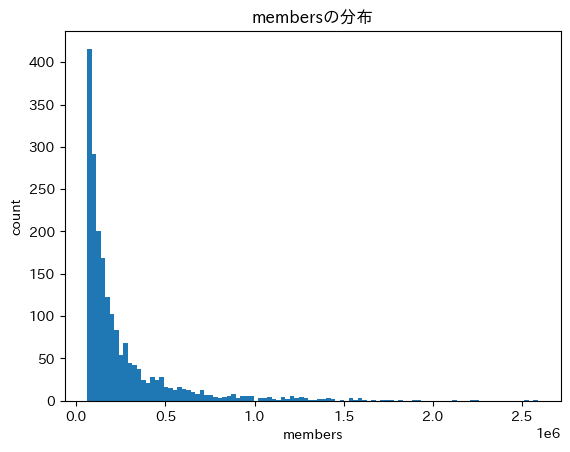

In [208]:
make_hist(anime, "members", bins=100)

In [237]:
anime.select(["japanese_name", "members"]).sort("members", descending=True).head(10)

japanese_name,members
str,i64
"""デスノート""",2589552
"""進撃の巨人""",2531397
"""鋼の錬金術師 FULLMETAL ALCHEMIST""",2248456
"""ソードアート・オンライン""",2214395
"""ワンパンマン""",2123866
"""僕のヒーローアカデミア""",1909814
"""東京喰種-トーキョーグール-""",1895488
"""ナルト""",1830540
"""STEINS;GATE""",1771162


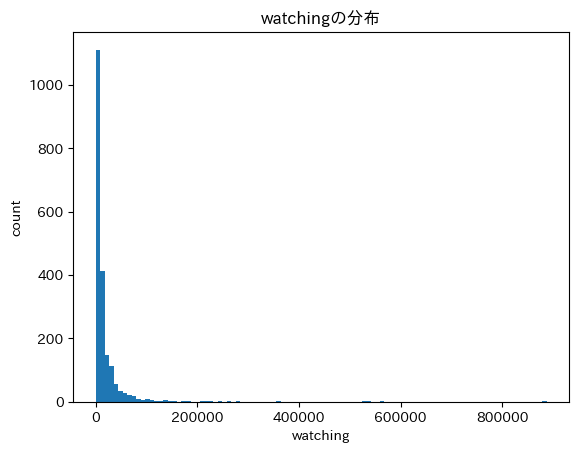

In [211]:
make_hist(anime, "watching", bins=100)

In [239]:
anime.select(["japanese_name", "watching"]).sort("watching", descending=True).head(10)

japanese_name,watching
str,i64
"""ONE PIECE""",887333
"""進撃の巨人 The Final Season""",566239
"""呪術廻戦""",533016
"""ブラッククローバー""",530324
"""ナルト- 疾風伝""",362124
"""BORUTO -NARUTO NEXT GENERATIONS-""",282596
"""約束のネバーランド""",260775
"""ホリミヤ""",245814
"""ドクターストーン STONE WARS""",229258


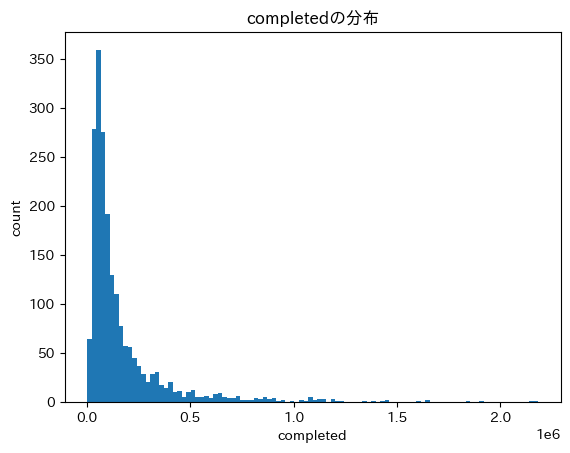

In [241]:
make_hist(anime, "completed", bins=100)

In [242]:
anime.select(["japanese_name", "completed"]).sort("completed", descending=True).head(10)

japanese_name,completed
str,i64
"""進撃の巨人""",2182587
"""デスノート""",2146116
"""ソードアート・オンライン""",1907261
"""ワンパンマン""",1841220
"""僕のヒーローアカデミア""",1655900
"""鋼の錬金術師 FULLMETAL ALCHEMIST""",1644938
"""東京喰種-トーキョーグール-""",1594880
"""ナルト""",1462223
"""君の名は。""",1462143


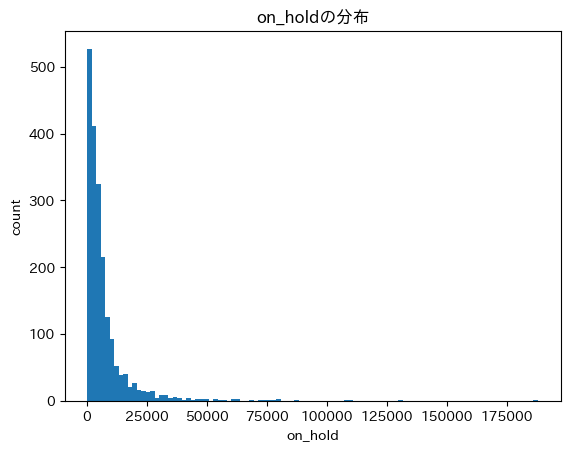

In [221]:
make_hist(anime, "on_hold", bins=100)

In [243]:
anime.select(["japanese_name", "on_hold"]).sort("on_hold", descending=True).head(10)

japanese_name,on_hold
str,i64
"""ONE PIECE""",187919
"""BLEACH - ブリーチ -""",130961
"""ナルト- 疾風伝""",109707
"""FAIRY TAIL（フェアリーテイル）""",108697
"""銀魂""",87145
"""HUNTER×HUNTER（ハンター×ハンター）""",79587
"""ブラッククローバー""",79487
"""ソウルイーター""",77117
"""鋼の錬金術師 FULLMETAL ALCHEMIST""",75728


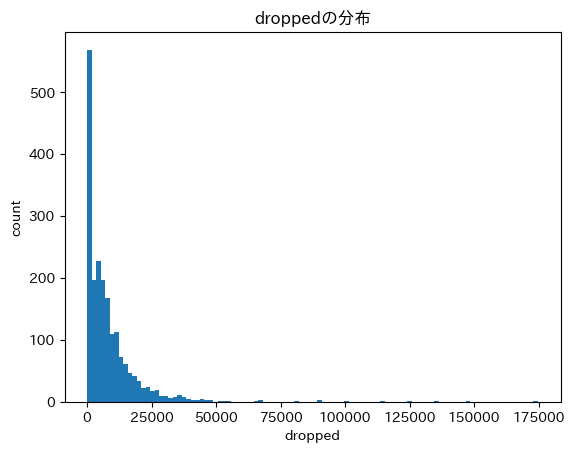

In [222]:
make_hist(anime, "dropped", bins=100)

In [244]:
anime.select(["japanese_name", "dropped"]).sort("dropped", descending=True).head(10)

japanese_name,dropped
str,i64
"""BLEACH - ブリーチ -""",174710
"""FAIRY TAIL（フェアリーテイル）""",148408
"""ONE PIECE""",136245
"""ナルト- 疾風伝""",124253
"""BORUTO -NARUTO NEXT GENERATIONS-""",113677
"""ナルト""",99806
"""ソードアート・オンライン""",90661
"""ブラッククローバー""",89594
"""デスノート""",80834


見る人の総数が多ければ、droppedの絶対値も大きくなる、割合に変換すべき

In [264]:
anime.with_columns(
    (pl.col("dropped") / pl.col("members")).alias("dropped_per_members")
).select(["japanese_name", "dropped", "members", "dropped_per_members"]).sort("dropped_per_members", descending=True).head(10)

japanese_name,dropped,members,dropped_per_members
str,i64,i64,f64
"""エンドライド""",16759,61776,0.271287
"""CONCEPTION（コンセプション）""",19393,83897,0.231152
"""Fairy gone フェアリーゴーン""",30934,134898,0.229314
"""ハンドシェイカー""",19376,87242,0.222095
"""BORUTO -NARUTO NEXT GENERATIONS-""",113677,529732,0.214593
"""逆転裁判 ～その「真実」、異議あり！～""",22473,107475,0.2091
"""TRICKSTER -江戸川乱歩「少年探偵団」より-""",18288,98209,0.186215
"""ケイオスドラゴン 赤竜戦役""",17953,96810,0.185446
"""コメット・ルシファー""",17808,97175,0.183257


In [260]:
anime.select(["japanese_name", "dropped", "members"]).filter(
    pl.col("japanese_name") == "CONCEPTION（コンセプション）"
)

japanese_name,dropped,members
str,i64,i64
"""CONCEPTION（コンセプション）""",19393,83897


In [263]:
anime.with_columns(
    (pl.col("dropped") / pl.col("members")).alias("dropped_per_members")
).select(["japanese_name", "dropped", "members", "dropped_per_members"]).sort("dropped_per_members", descending=False).head(10)

japanese_name,dropped,members,dropped_per_members
str,i64,i64,f64
"""BLEACH 千年血戦篇""",0,61371,0.0
"""シン・エヴァンゲリオン劇場版:||""",0,162841,0.0
"""転スラ日記 転生したらスライムだった件""",0,62412,0.0
"""メイドインアビス 続編""",0,81060,0.0
"""転生したらスライムだった件""",0,81377,0.0
"""小林さんちのメイドラゴンS""",0,106489,0.0
"""僕のヒーローアカデミア""",2,231671,0.000009
"""かぐや様は告らせたい ～天才たちの恋愛頭脳戦～""",1,111055,0.000009
"""盾の勇者の成り上がり Season2""",2,219840,0.000009


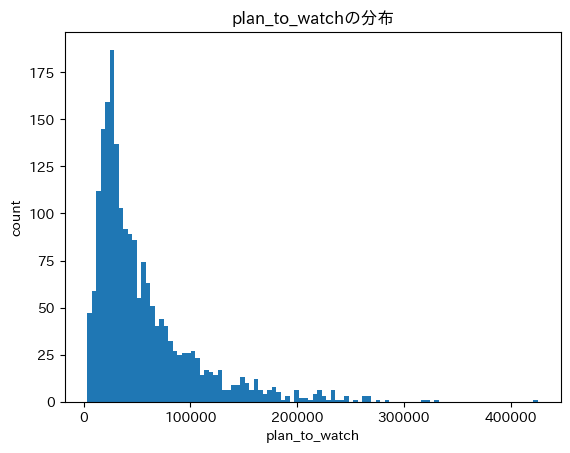

In [223]:
make_hist(anime, "plan_to_watch", bins=100)

In [245]:
anime.select(["japanese_name", "plan_to_watch"]).sort("plan_to_watch", descending=True).head(10)

japanese_name,plan_to_watch
str,i64
"""STEINS;GATE""",425531
"""カウボーイビバップ""",329800
"""鋼の錬金術師 FULLMETAL ALCHEMIST""",323463
"""サイコパス""",319373
"""劇場版 鬼滅の刃 無限列車編""",285913
"""デュラララ!!""",274277
"""氷菓""",269197
"""蟲師""",267080
"""バッカーノ！""",266957
